# Introduction

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
import pandas as pd


# df = pd.read_csv('vehicles.csv')

# df.columns

# Data Cleaning & Preprocessing

In [3]:
# df_cleaned = df

# Trainning & Fitting Machine Learning Models

## 1. Linear Regression Model: Ridge Regression

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [5]:
# Load the dataset
# file_path = "/Users/arielzhang/Documents/MSDS422/cleaned_vehicles.csv"
file_path = "./cleaned_vehicles.csv"
df = pd.read_csv(file_path)

In [6]:
# Drop irrelevant columns
drop_cols = ["id", "url", "region_url", "image_url", "description", "VIN", "posting_date"]
df = df.drop(columns=drop_cols)

# One-Hot Encode categorical features
categorical_features = ["region", "condition", "title_status", "cylinders", "state"]
# Apply Ordinal Encoding
encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])
df.head

<bound method NDFrame.head of        region  price    year  manufacturer  model  condition  cylinders  fuel  \
0        16.0  27990  2012.0            14   6285        2.0        6.0     2   
1        16.0  34590  2016.0             7   6357        2.0        5.0     2   
2        16.0  29990  2016.0             7   2328        2.0        5.0     2   
3        16.0  38590  2011.0             7   2442        2.0        6.0     2   
4        16.0  32990  2017.0            20   7499        2.0        5.0     2   
...       ...    ...     ...           ...    ...        ...        ...   ...   
67636   393.0  25590  2017.0            13    969        2.0        5.0     2   
67637   393.0  32990  2016.0            18   5688        2.0        6.0     2   
67638   393.0  33590  2018.0            23   4261        2.0        5.0     2   
67639   393.0  23590  2019.0            30   4908        2.0        5.0     2   
67640   393.0  28990  2018.0            23   3088        2.0        5.0     2  

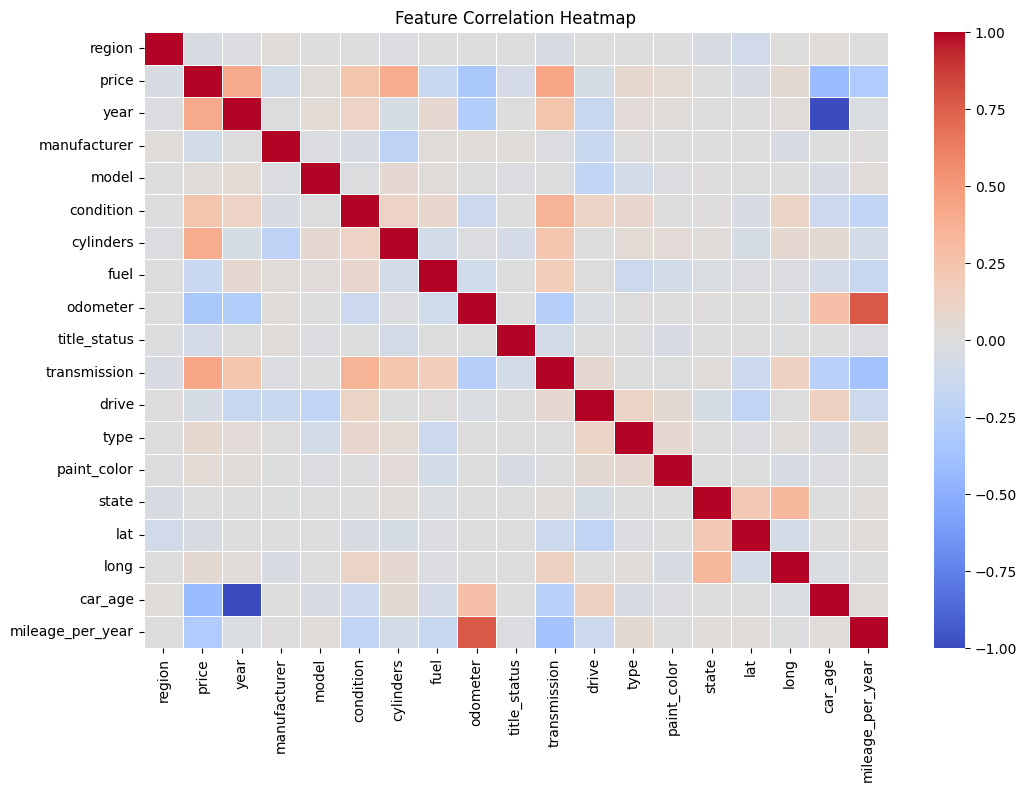

In [7]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
drop_features = ["lat", "long", "state", "paint_color", "drive"]
df = df.drop(columns=drop_features, errors="ignore")

In [9]:
df = df.drop(columns=["year"], errors="ignore")

In [10]:
# Define target and features
target = "price"
X = df.drop(columns=[target])
y = df[target]

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-2, 3, 10)
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)
print(f"Best alpha: {ridge_cv.alpha_}")

Best alpha: 278.2559402207126


In [13]:
# Train Ridge Regression model
ridge = Ridge(alpha=278.2559402207126)
ridge.fit(X_train, y_train)

Ridge(alpha=278.2559402207126)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predictions
y_pred = ridge.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Root Mean Squared Error (RMSE): 9639.78
Mean Absolute Error (MAE): 6659.89
R-squared (R²): 0.5004


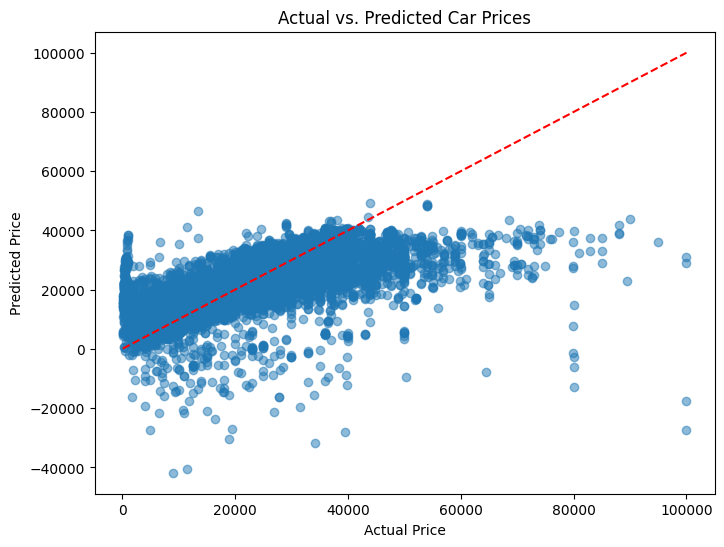

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Identity line
plt.show()


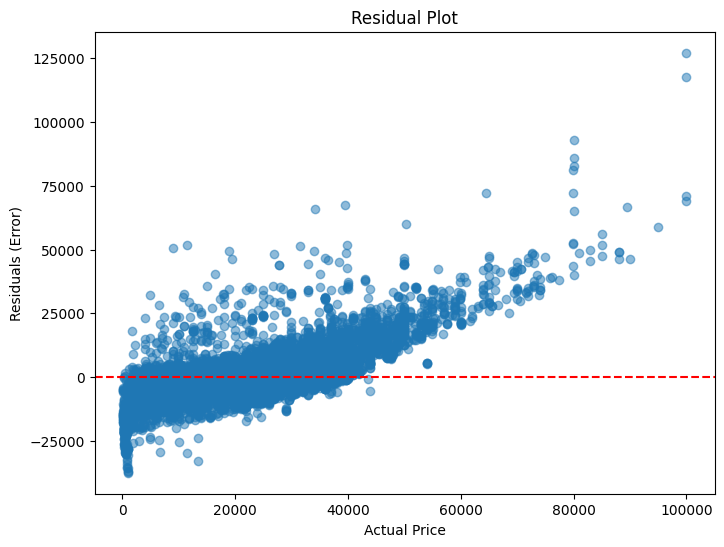

In [16]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()


## 2. Tree-Based Model: Random Forest Regressor

Dataset shape: (67641, 26)

Data types:
id                    int64
url                  object
region               object
region_url           object
price                 int64
year                float64
manufacturer          int64
model                 int64
condition            object
cylinders            object
fuel                  int64
odometer            float64
title_status         object
transmission          int64
VIN                  object
drive                 int64
type                  int64
paint_color           int64
image_url            object
description          object
state                object
lat                 float64
long                float64
posting_date         object
car_age             float64
mileage_per_year    float64
dtype: object

Summary statistics:
                 id         price          year  manufacturer         model  \
count  6.764100e+04  67641.000000  67641.000000  67641.000000  67641.000000   
mean   7.311425e+09  20404.747860   201

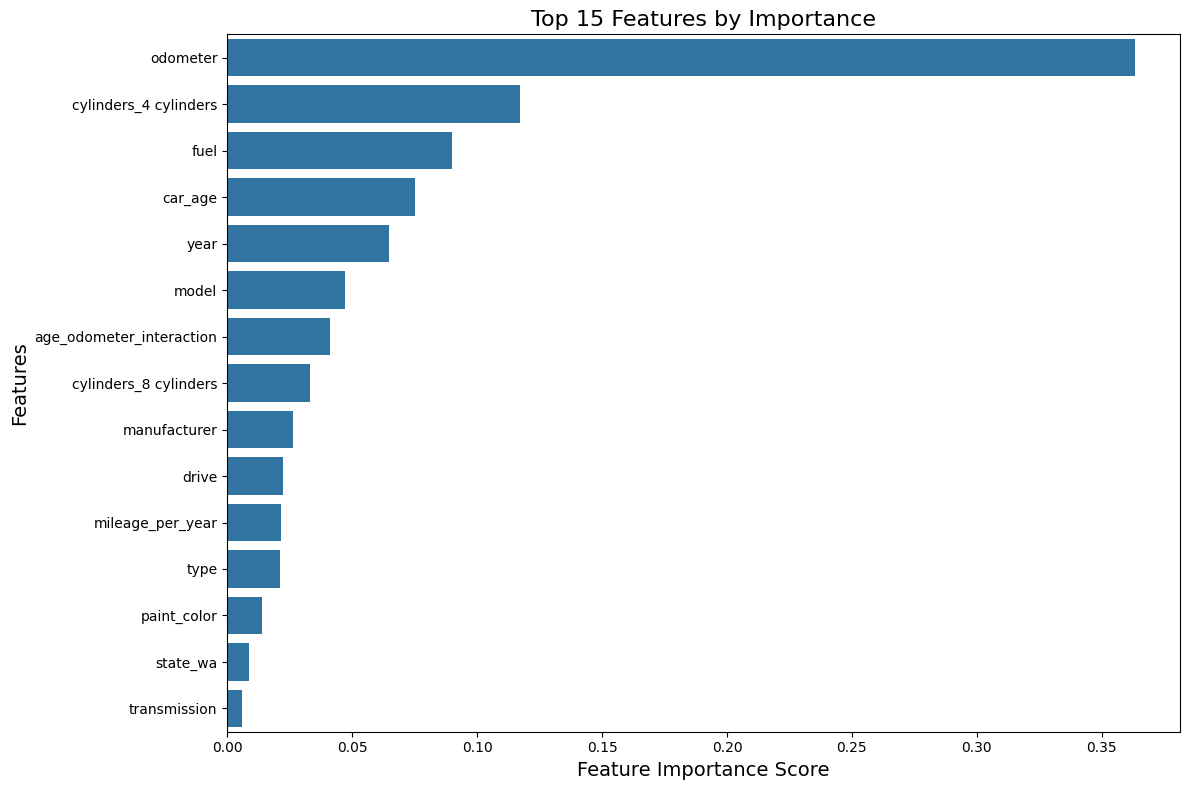

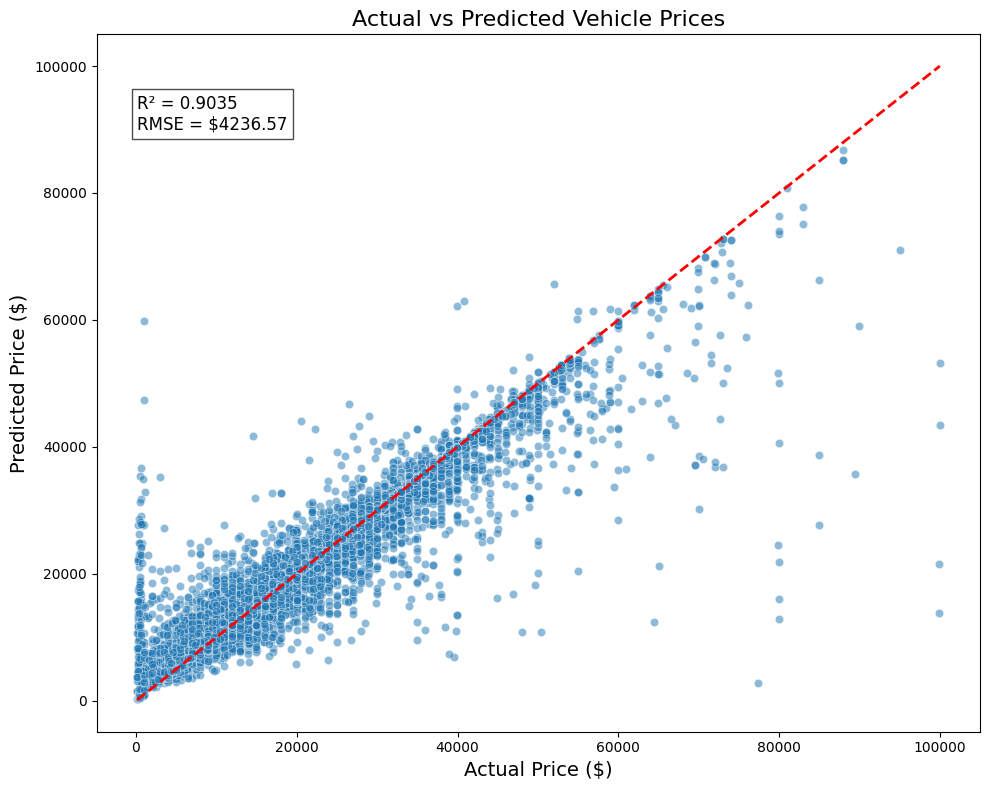

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import warnings
warnings.filterwarnings('ignore')


# Start timing
start_time = time.time()

# Load dataset
# file_path = "/Users/arielzhang/Documents/MSDS422/cleaned_vehicles.csv"
file_path = "./cleaned_vehicles.csv"
df = pd.read_csv(file_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\nMissing values:")
    print(missing_values[missing_values > 0])
else:
    print("\nNo missing values found.")

# Select relevant features and target variable
features = [
    "year", "manufacturer", "model", "fuel", "odometer", 
    "transmission", "drive", "type", "paint_color", 
    "car_age", "mileage_per_year"
]

# Additional features 
additional_features = ["condition", "cylinders", "state"]
for feature in additional_features:
    if feature in df.columns:
        features.append(feature)

target = "price"

# Feature Engineering
print("\nPerforming feature engineering...")
X = df[features].copy()

# Create new features
X['age_odometer_interaction'] = X['car_age'] * X['odometer']

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split data into training and testing sets
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Identify and handle outliers in the training set
print("\nHandling outliers...")
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
Q1 = X_train[numeric_cols].quantile(0.05)
Q3 = X_train[numeric_cols].quantile(0.95)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = ~((X_train[numeric_cols] < lower_bound) | (X_train[numeric_cols] > upper_bound)).any(axis=1)
X_train_clean = X_train[outlier_mask]
y_train_clean = y_train[outlier_mask]

print(f"Removed {X_train.shape[0] - X_train_clean.shape[0]} outliers from the training set.")
print(f"Clean training set shape: {X_train_clean.shape}")

# Train initial Random Forest model
print("\nTraining initial model...")
initial_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
initial_rf.fit(X_train_clean, y_train_clean)

# Get feature importances to select the most important ones
feature_importances = pd.DataFrame({
    'feature': X_train_clean.columns,
    'importance': initial_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 features by importance:")
print(feature_importances.head(15))

# Select top features 
top_features = feature_importances.head(15)['feature'].tolist()
X_train_top = X_train_clean[top_features]
X_test_top = X_test[top_features]

# Hyperparameter tuning 
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 20, 30],
    "min_samples_split": [2, 5, 8],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring="r2",
    verbose=1
)

grid_search.fit(X_train_top, y_train_clean)
best_params = grid_search.best_params_
print(f"\nBest Parameters: {best_params}")

# Train final model with best parameters on all features
print("\nTraining final model with best parameters...")
best_rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    **best_params
)

# Calculate cross-validation score on clean training data
cv_scores = cross_val_score(best_rf, X_train_clean, y_train_clean, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train the final model
best_rf.fit(X_train_clean, y_train_clean)

# Predict on test set
y_pred = best_rf.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate prediction accuracy (within 10% threshold)
accuracy = np.mean(np.abs((y_pred - y_test) / y_test) < 0.1)

# Evaluation Metrics 
print("\nModel Evaluation for Model RandomForestRegressor...")
print("RandomForestRegressor Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {1-accuracy:.4f}")  # Interpreting MSE as error rate
print(f"MAE: {mae/np.mean(y_test):.4f}")  # Normalized MAE
print(f"RMSE: {rmse/np.mean(y_test):.4f}")  # Normalized RMSE
print(f"R² Score: {r2:.4f}")

# Also display the traditional metrics for reference
print("\nTraditional Regression Metrics:")
print(f"MAE: ${mae:.2f}")
print(f"MSE: ${mse:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Calculate execution time
execution_time = time.time() - start_time
print(f"\nExecution time: {execution_time:.2f} seconds ({execution_time/60:.2f} minutes)")


# 1. Feature Importance Plot
plt.figure(figsize=(12, 8))
top_features_df = feature_importances.head(15)
sns.barplot(x='importance', y='feature', data=top_features_df)
plt.title('Top 15 Features by Importance', fontsize=16)
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Actual vs Predicted Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.xlabel('Actual Price ($)', fontsize=14)
plt.ylabel('Predicted Price ($)', fontsize=14)
plt.title('Actual vs Predicted Vehicle Prices', fontsize=16)
plt.text(y_test.min() * 1.1, y_test.max() * 0.9, 
         f'R² = {r2:.4f}\nRMSE = ${rmse:.2f}', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.tight_layout()
plt.show()



## 3. Time Series Analysis: LSTM & Linear Regression

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import math

# df = pd.read_csv('vehicles.csv', nrows=10000)
df = pd.read_csv('vehicles.csv')
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

# Data Cleaning & Preprocessing

In [19]:
# Step 1: Perform log transform on 'price' to stabilize training
df['price_backup'] = df['price']
df['price'] = np.log(df['price'] + 1)  # avoid log(0) issue

# Step 2: Drop rows with missing critical fields
df = df.dropna(subset=['VIN', 'price', 'posting_date'])
df = df[df['price'] > 0]
df = df[df['VIN'] != '']

# Step 3: Forward-fill other missing values (if any)
df.fillna(method="ffill", inplace=True)

# Step 4: Convert 'posting_date' to datetime and sort by VIN & date
df['posting_date'] = pd.to_datetime(df['posting_date'])
df = df.sort_values(by=['VIN', 'posting_date'])

# Step 5: Create "brand_model" for embedding usage
df['brand_model'] = df['manufacturer'].astype(str) + '_' + df['model'].astype(str)

# Step 6: Encode VIN and brand_model as integer IDs
vin_list = df['VIN'].unique().tolist()
vin_to_id = {v: i for i, v in enumerate(vin_list)}
df['vin_id'] = df['VIN'].map(vin_to_id)

bm_list = df['brand_model'].unique().tolist()
bm_to_id = {bm: i for i, bm in enumerate(bm_list)}
df['bm_id'] = df['brand_model'].map(bm_to_id)

# Step 7: Decide numeric columns to feed into the model
numeric_cols = ['price', 'odometer', 'year']

In [20]:
# =============================================================================
# 2. BUILD SEQUENCES WITH SLIDING WINDOW
# =============================================================================

seq_len = 3  # we use the previous 3 records to predict the next one

data_sequences = []
grouped = df.groupby('VIN', sort=False)

for vin, group in grouped:
    # Sort each VIN group by date
    group = group.sort_values('posting_date').reset_index(drop=True)
    
    # numeric_data: shape [T, len(numeric_cols)] => [price, odometer, year]
    numeric_data = group[numeric_cols].values
    # vin_ids, bm_ids => to track VIN embeddings
    vin_ids = group['vin_id'].values
    bm_ids  = group['bm_id'].values
    # date_arr => posting_date for later reference
    date_arr = group['posting_date'].values
    
    # If the group length is smaller than seq_len, we skip
    if len(group) <= seq_len:
        continue
    
    # Create sliding windows
    for start_idx in range(len(group) - seq_len):
        end_idx = start_idx + seq_len
        
        # X_seq_* = the previous 'seq_len' records
        X_seq_numeric = numeric_data[start_idx:end_idx]  # shape [seq_len, 3]
        X_seq_vin     = vin_ids[start_idx:end_idx]       # shape [seq_len]
        X_seq_bm      = bm_ids[start_idx:end_idx]        # shape [seq_len]
        
        # y_price = the log(price) at the next time step (end_idx)
        y_price = numeric_data[end_idx, 0]  # numeric_data[...,0] => price
        # y_date = posting_date at that next time step
        y_date  = date_arr[end_idx]
        
        # Append a tuple of 6 items:
        # (X_seq_numeric, X_seq_vin, X_seq_bm, y_price, y_date, vin_string)
        data_sequences.append((
            X_seq_numeric,
            X_seq_vin,
            X_seq_bm,
            y_price,
            y_date,
            vin  # we can keep original vin (string) for reference
        ))

print("Number of sequence samples:", len(data_sequences))

Number of sequence samples: 79870


In [21]:
# =============================================================================
# 3. SPLIT DATA: 20% HOLD-OUT TEST, 80% FOR CROSS VALIDATION
# =============================================================================

# np.random.shuffle(data_sequences)
holdout_ratio = 0.2
holdout_size = int(len(data_sequences) * holdout_ratio)
test_holdout_data = data_sequences[:holdout_size]  # 20% => final test
cv_data = data_sequences[holdout_size:]            # 80% => cross validation

print("Holdout size:", holdout_size, " CV size:", len(cv_data))

Holdout size: 15974  CV size: 63896


===

In [22]:
import numpy as np

def build_Xy_for_linear(data_list, seq_len=3):
    """
    data_list 每个元素: (X_seq_numeric, X_seq_vin, X_seq_bm, y_price, y_date, vin_str)
    X_seq_numeric shape = [seq_len, num_numeric_features]
    扁平化 X_seq_numeric => [seq_len * num_numeric_features]
    返回: X, y
    """
    X_list = []
    y_list = []
    for (num_seq, vin_seq, bm_seq, y, y_date, vin_str) in data_list:
        # num_seq shape => (seq_len, num_numeric_features)
        # flatten:
        x_flat = num_seq.flatten()  # shape (seq_len * num_numeric_features,)
        
        X_list.append(x_flat)
        y_list.append(y)
    
    X = np.array(X_list, dtype=np.float32)
    y = np.array(y_list, dtype=np.float32)
    return X, y


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV
import math

# -- Assume data_sequences is ready
# Shuffle + split holdout
# np.random.shuffle(data_sequences)
holdout_ratio = 0.2
holdout_size = int(len(data_sequences) * holdout_ratio)
test_holdout_data = data_sequences[:holdout_size]
cv_data = data_sequences[holdout_size:]

# First, convert holdout to X_test, y_test
X_test, y_test = build_Xy_for_linear(test_holdout_data, seq_len=3)

In [24]:
# First, convert cv_data to X_cv, y_cv
X_cv, y_cv = build_Xy_for_linear(cv_data, seq_len=3)

# Construct param_grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]  # Just demonstrating
}

# Build model: Ridge
ridge_model = Ridge()

# Use scikit-learn's GridSearchCV
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(ridge_model, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_cv, y_cv)

# Output the best result
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_  # Note this is -MSE
print("Best alpha:", best_alpha)
print("Best CV MSE:", -best_score)

Best alpha: 10.0
Best CV MSE: 0.07300909484426181


/Users/evelyn/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.82468e-12): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/evelyn/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.26467e-12): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/evelyn/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.26487e-12): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/evelyn/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.72552e-12): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrit

In [25]:
from sklearn.linear_model import Ridge
import numpy as np
import math
import statsmodels.api as sm

# Train final model with best_alpha
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_cv, y_cv)

# Predict on test set
y_pred_test = final_model.predict(X_test)

# Calculate MSE and RMSE
mse_test = np.mean((y_pred_test - y_test)**2)
rmse_test = math.sqrt(mse_test)
print(f"Final Test MSE={mse_test:.4f}, RMSE={rmse_test:.4f}")

# Print model coefficients and intercept
print("\n--- Ridge Regression Model Summary ---")
print("Intercept:", final_model.intercept_)
print("Coefficients:")
for idx, coef in enumerate(final_model.coef_):
    print(f"  Feature {idx+1}: {coef:.4f}")

# Optionally, if you want a full statistical summary, you can use statsmodels:
# Note: For Ridge, this is a rough approximation (ignoring the regularization) 
X_test_sm = sm.add_constant(X_test)
ols_model = sm.OLS(y_test, X_test_sm).fit()
print("\n--- OLS Summary (as an approximation) ---")
print(ols_model.summary())

Final Test MSE=0.0774, RMSE=0.2782

--- Ridge Regression Model Summary ---
Intercept: 0.43671417
Coefficients:
  Feature 1: 0.0649
  Feature 2: -0.0000
  Feature 3: -0.0015
  Feature 4: 0.0239
  Feature 5: -0.0000
  Feature 6: 0.0005
  Feature 7: 0.9075
  Feature 8: 0.0000
  Feature 9: 0.0008

--- OLS Summary (as an approximation) ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 2.655e+04
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:28:19   Log-Likelihood:                -1911.2
No. Observations:               15974   AIC:                             3842.
Df Residuals:                   15964   BIC:                             3919.
Df Model:                      

In [26]:
def build_infer_data(data_list, seq_len=3):
    """
    Returns: X_array, y_array, date_list, vin_list
    where X_array is flattened
    """
    X_list, y_list, date_list, vin_list = [], [], [], []
    for (num_seq, vin_seq, bm_seq, y, y_date, vin_str) in data_list:
        X_list.append(num_seq.flatten())
        y_list.append(y)
        date_list.append(y_date)
        vin_list.append(vin_str)
    
    X_arr = np.array(X_list, dtype=np.float32)
    y_arr = np.array(y_list, dtype=np.float32)
    return X_arr, y_arr, date_list, vin_list

# Perform inference on holdout
X_inf, y_inf, date_arr, vin_arr = build_infer_data(test_holdout_data)

y_pred_inf = final_model.predict(X_inf)  # Linear model prediction (log space?)
# Revert log -> price
y_inf_exp = np.exp(y_inf) - 1
y_pred_inf_exp = np.exp(y_pred_inf) - 1

# DataFrame
df_pred = pd.DataFrame({
    'VIN': vin_arr,
    'date': date_arr,
    'y_true': y_inf_exp,
    'y_pred': y_pred_inf_exp
})
df_pred.sort_values(by=['VIN', 'date'], inplace=True)

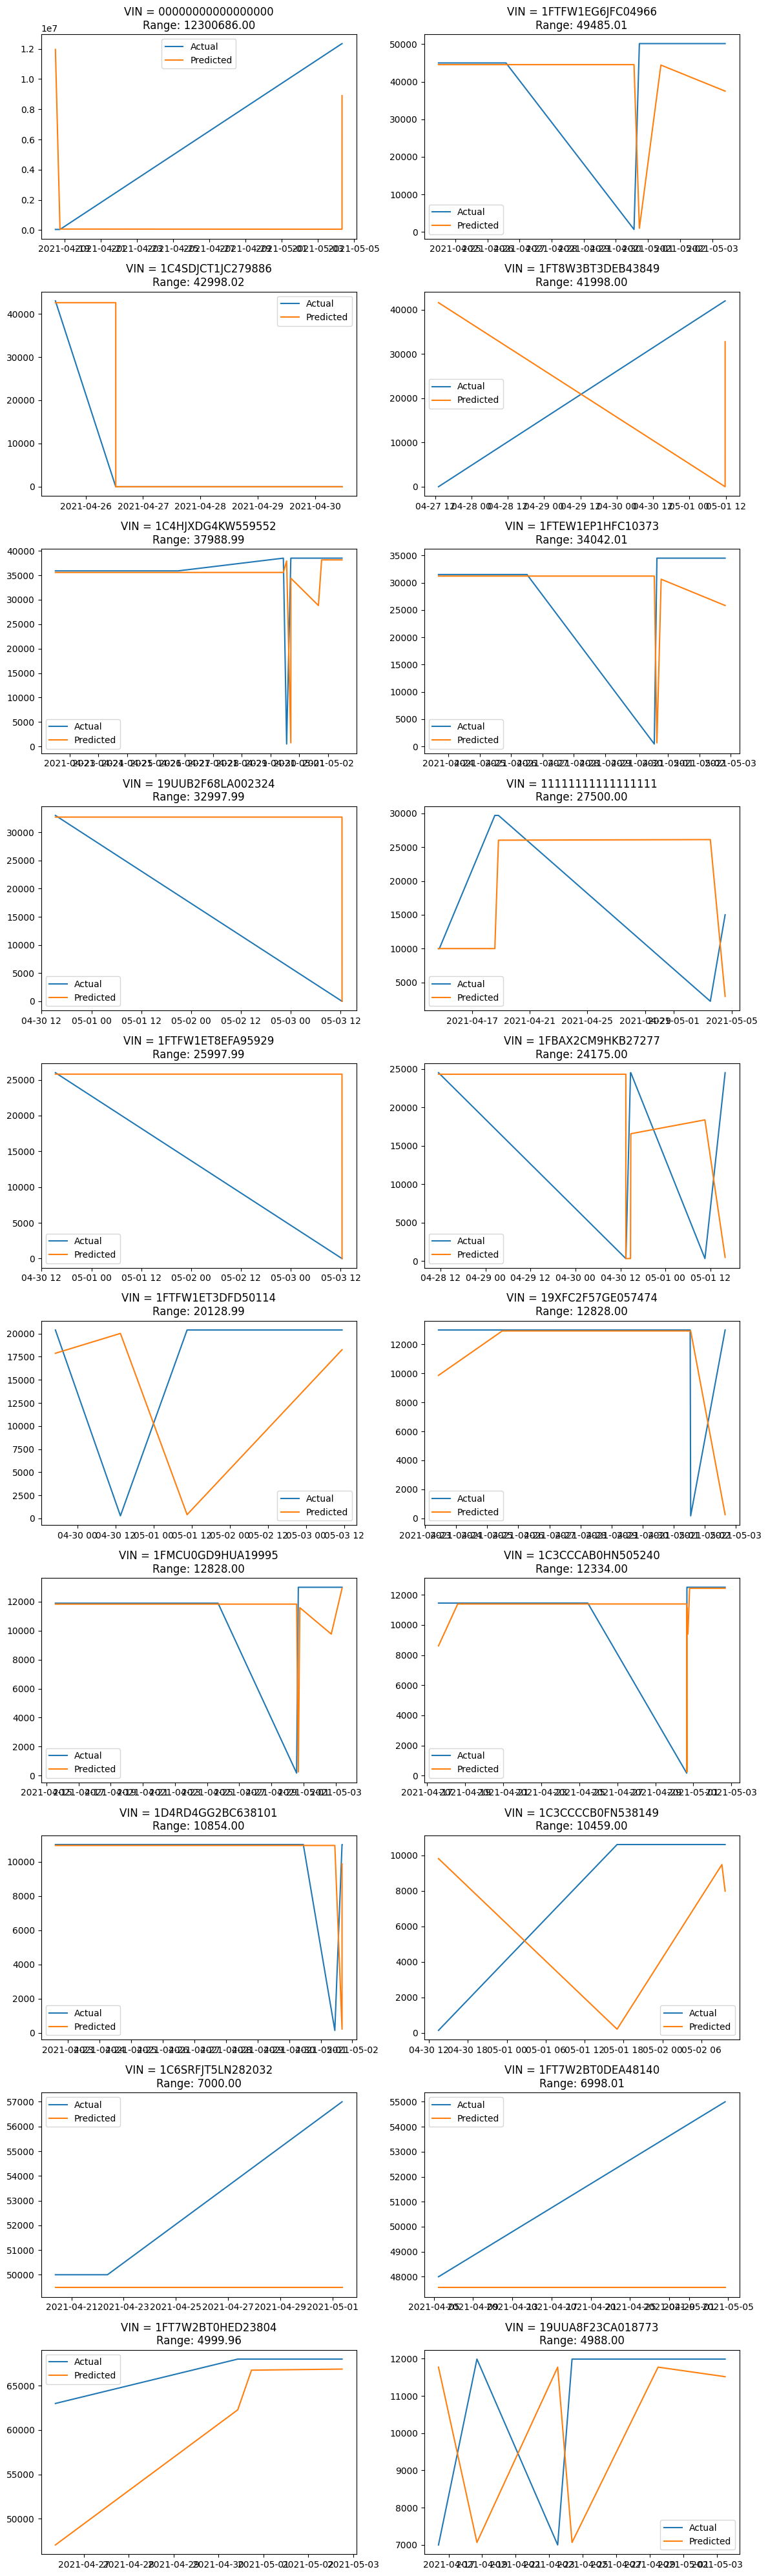

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Assume you already have df_pred containing columns: ['VIN', 'date', 'y_true', 'y_pred']
# where y_true, y_pred are original prices (if previously log(price+1) was done, remember it has been reverted exp(...) - 1)

# 1) Group by VIN and calculate "Volatility" = max(y_true) - min(y_true)
vin_ranges = []
grouped = df_pred.groupby('VIN')
for vin, group in grouped:
    price_range = group['y_true'].max() - group['y_true'].min()
    vin_ranges.append((vin, price_range))

# 2) Sort by volatility in descending order
vin_ranges.sort(key=lambda x: x[1], reverse=True)

# 3) Select the top N (e.g., 5) VINs with the greatest price volatility
top_n = 20
selected_vins = [x[0] for x in vin_ranges[:top_n]]

# 4) Plot: Create a small plot (subplot) for each VIN
num_vins = len(selected_vins)
cols = 2  # Put 2 plots per row
rows = math.ceil(num_vins / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
# If there is only 1 row and column, axes might not be an array, here we flatten it
axes = axes.flatten() if num_vins > 1 else [axes]

for i, vin_id in enumerate(selected_vins):
    ax = axes[i]
    
    # Extract data for this VIN
    tmp = df_pred[df_pred['VIN'] == vin_id].copy()
    tmp.sort_values('date', inplace=True)
    
    # Plot actual price vs. predicted price
    ax.plot(tmp['date'], tmp['y_true'], label='Actual')
    ax.plot(tmp['date'], tmp['y_pred'], label='Predicted')
    
    # Add "Volatility range" info to the title for assistance
    vin_range = vin_ranges[i][1]
    ax.set_title(f"VIN = {vin_id}\nRange: {vin_range:.2f}")
    ax.legend()

# If top_n < rows*cols are selected, there will be extra subplots which can be hidden here
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [28]:
# Example: Linear Regression + Predictions using flattened sliding window
X_inf, y_inf_log, date_arr, vin_arr = build_infer_data(test_holdout_data)
y_pred_log = final_model.predict(X_inf)

# If log(price+1) was used during training,
# Restore the original:
y_true = np.exp(y_inf_log) - 1
y_pred = np.exp(y_pred_log) - 1

import pandas as pd

df_pred = pd.DataFrame({
    'VIN': vin_arr,
    'date': date_arr,
    'y_true': y_true,
    'y_pred': y_pred
})
df_pred.sort_values(['VIN', 'date'], inplace=True)

In [29]:
# For example, first count the number of samples for each VIN in the holdout
vin_counts = df_pred['VIN'].value_counts()
top_vins = vin_counts.index[:3]  # Select the top 3 VINs with the most samples

In [30]:
df_pred['AE'] = (df_pred['y_true'] - df_pred['y_pred']).abs()
df_pred['APE'] = df_pred['AE'] / (df_pred['y_true'].abs() + 1e-6)  # Avoid division by zero
df_pred['APE%'] = df_pred['APE'] * 100

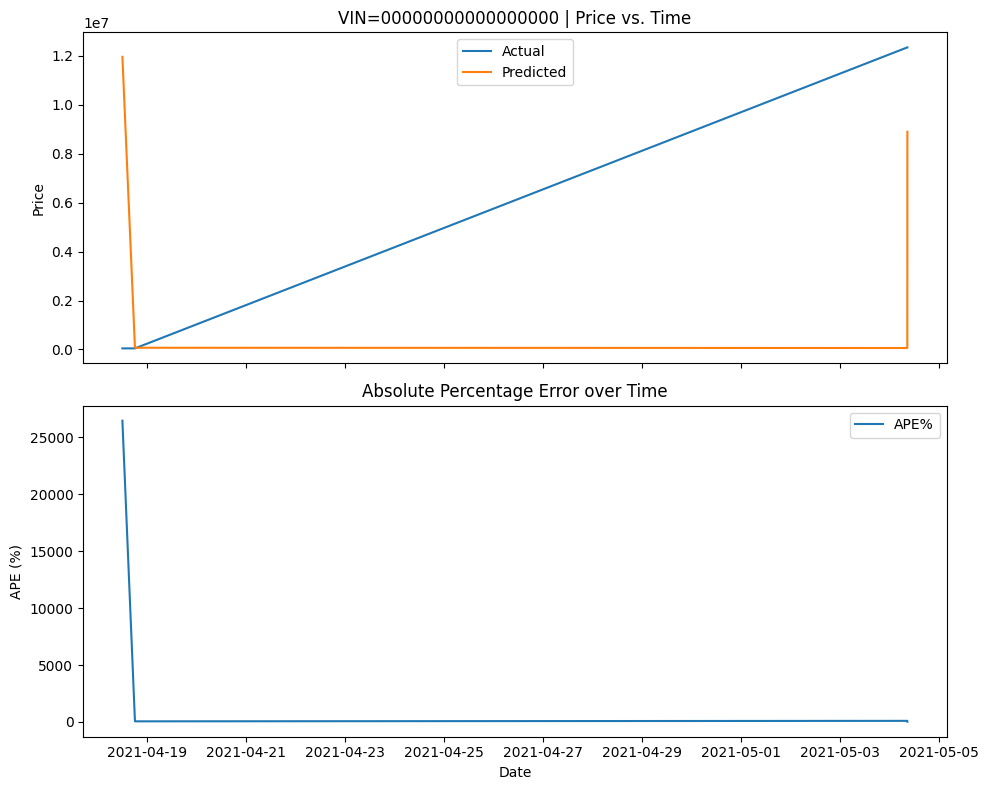

In [31]:
import matplotlib.pyplot as plt

def plot_vin_time_series(vin_id, df):
    """
    df: DataFrame with columns [VIN, date, y_true, y_pred, AE, APE, APE%]
    """
    tmp = df[df['VIN'] == vin_id].copy()
    tmp.sort_values('date', inplace=True)
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
    
    # -- (1) Upper plot: Actual vs. Predicted Prices
    axes[0].plot(tmp['date'], tmp['y_true'], label='Actual')
    axes[0].plot(tmp['date'], tmp['y_pred'], label='Predicted')
    axes[0].set_ylabel("Price")
    axes[0].set_title(f"VIN={vin_id} | Price vs. Time")
    axes[0].legend()
    
    # -- (2) Lower plot: Error over Time
    # Using APE% (Absolute Percentage Error) as an example
    axes[1].plot(tmp['date'], tmp['APE%'], label='APE%')
    axes[1].set_ylabel("APE (%)")
    axes[1].set_title("Absolute Percentage Error over Time")
    axes[1].legend()
    
    # X-axis
    axes[1].set_xlabel("Date")
    plt.tight_layout()
    plt.show()

# Usage: Plot for a specific VIN
sample_vin = df_pred['VIN'].iloc[0]
plot_vin_time_series(sample_vin, df_pred)

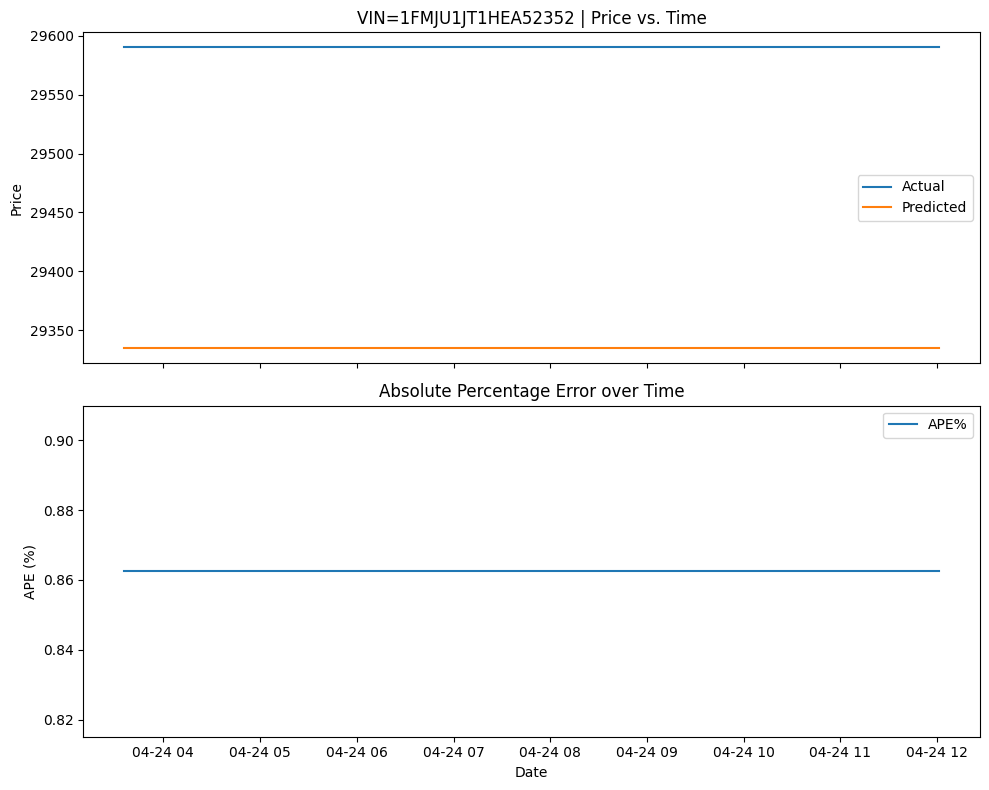

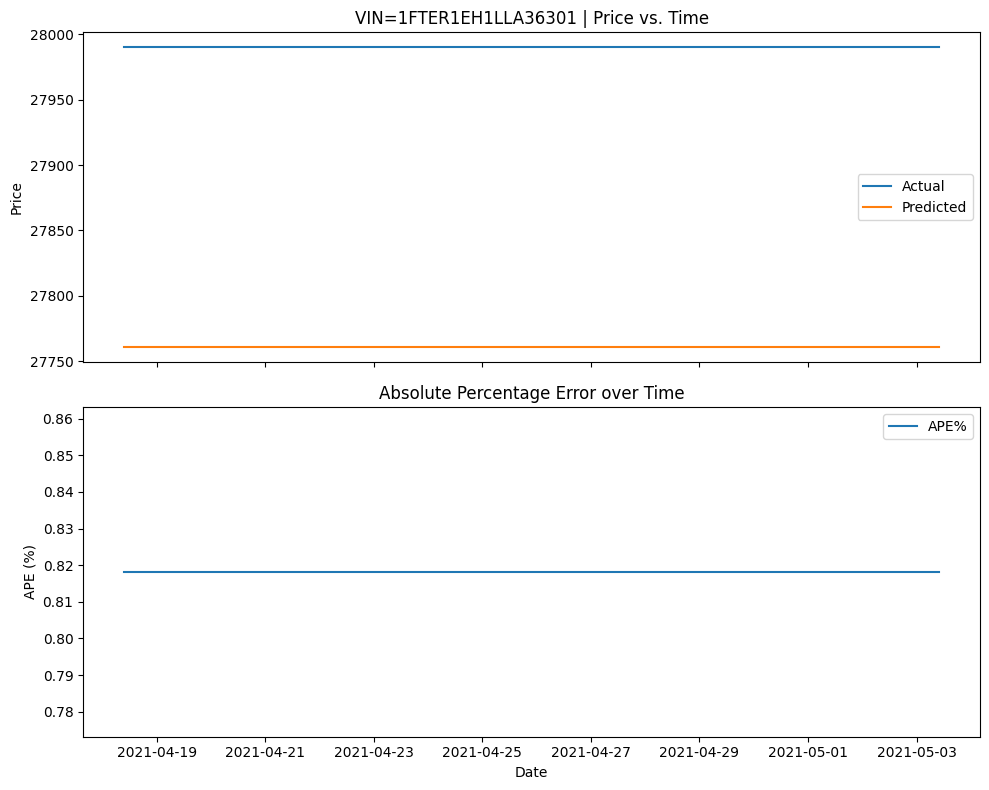

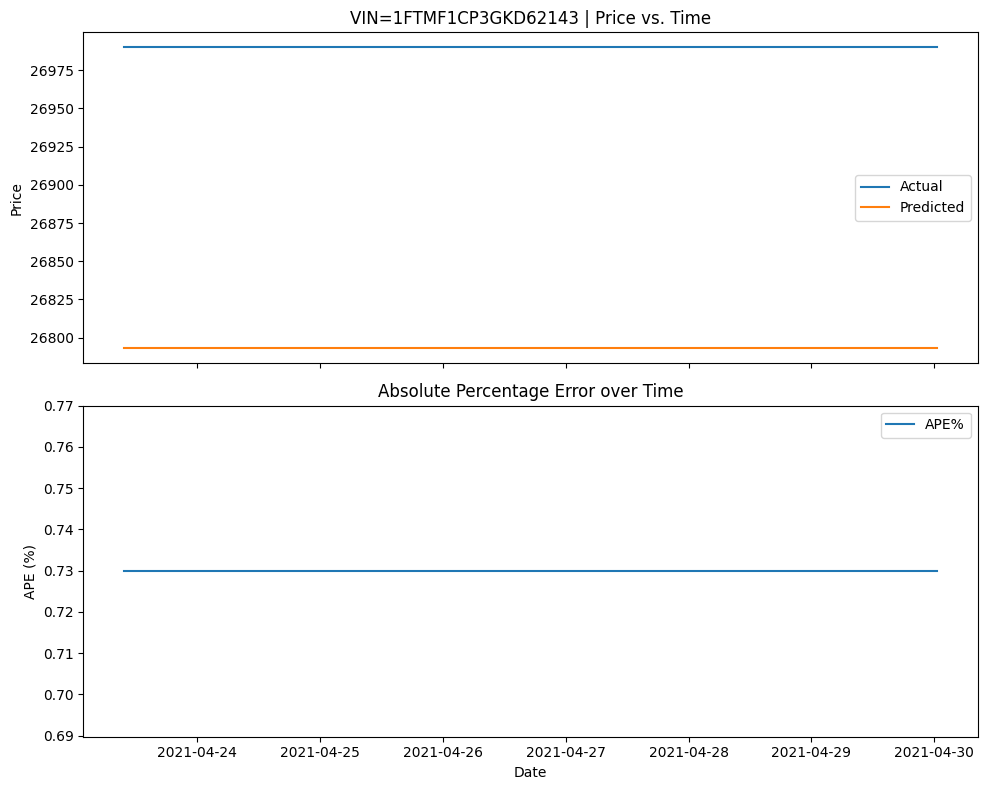

In [32]:
representative_vins = top_vins[:3]
for vin_id in representative_vins:
    plot_vin_time_series(vin_id, df_pred)


In [33]:
import numpy as np

vin_stats = df_pred.groupby('VIN').agg({
    'AE': ['mean', 'std'],
    'APE%': ['mean', 'std']
}).reset_index()

vin_stats.columns = ['VIN', 'AE_mean', 'AE_std', 'APE_mean', 'APE_std']
vin_stats.sort_values('APE_mean', inplace=True)
vin_stats.head(10)


,VIN,AE_mean,AE_std,APE_mean,APE_std
1220,1FAFP53U56A238775,0.002686,NaN,0.000096,NaN
1758,1FMZU73K03ZA83684,0.260254,0.0,0.006197,0.0
1750,1FMYU93155KD10524,0.291992,0.0,0.009733,0.0
137,1B4HR38N62F174971,1.015137,NaN,0.020323,NaN
1756,1FMZU72K83UA55811,0.653320,0.0,0.021850,0.0
2444,1FTEX14H3PKB08540,2.333008,0.0,0.025937,0.0
1026,1D4HB58D14F174876,1.444336,NaN,0.027277,NaN
1213,1FAFP37N67W231216,1.139160,0.0,0.028515,0.0
1211,1FAFP34314W170937,1.238770,0.0,0.033489,0.0
1027,1D4HR38N13F620886,1.402588,NaN,0.036431,NaN


==============

In [34]:
# =============================================================================
# 4. DEFINE 2 DATASET BUILDING FUNCTIONS
# =============================================================================

def build_dataset_for_train(data_list, batch_size=64, shuffle=False):
    """
    Used for model.fit() or model.evaluate().
    We only return ((X_numeric, X_vin, X_bm), y_label) to match the model's single-output structure.
    This avoids the mismatch between y_true and model outputs.
    """
    X_numeric = []
    X_vin = []
    X_bm  = []
    y_label = []
    
    for (num_seq, vin_seq, bm_seq, y, date_val, vin_str_val) in data_list:
        X_numeric.append(num_seq)
        X_vin.append(vin_seq)
        X_bm.append(bm_seq)
        y_label.append(y)
    
    X_numeric = np.array(X_numeric, dtype=np.float32)  # shape: [N, seq_len, #numeric_cols]
    X_vin     = np.array(X_vin,     dtype=np.int32)    # shape: [N, seq_len]
    X_bm      = np.array(X_bm,      dtype=np.int32)    # shape: [N, seq_len]
    y_label   = np.array(y_label,   dtype=np.float32)  # shape: [N]
    
    ds = tf.data.Dataset.from_tensor_slices(((X_numeric, X_vin, X_bm), y_label))
    if shuffle:
        ds = ds.shuffle(len(data_list))
    ds = ds.batch(batch_size)
    return ds

def build_dataset_for_inference(data_list, batch_size=64):
    """
    Used for inference/visualization where we want the date/VIN as well.
    We return ((X_numeric, X_vin, X_bm), (y_label, date_str, vin_str)),
    so we can manually call model.predict(...) while retaining date & VIN info.
    """
    X_numeric = []
    X_vin = []
    X_bm  = []
    y_label = []
    date_list = []
    vin_list  = []
    
    for (num_seq, vin_seq, bm_seq, y, date_val, vin_str_val) in data_list:
        X_numeric.append(num_seq)
        X_vin.append(vin_seq)
        X_bm.append(bm_seq)
        y_label.append(y)
        date_list.append(str(date_val))   # convert to string to avoid TensorFlow type issues
        vin_list.append(str(vin_str_val))
    
    X_numeric = np.array(X_numeric, dtype=np.float32)
    X_vin     = np.array(X_vin,     dtype=np.int32)
    X_bm      = np.array(X_bm,      dtype=np.int32)
    y_label   = np.array(y_label,   dtype=np.float32)
    date_list = np.array(date_list)
    vin_list  = np.array(vin_list)
    
    ds = tf.data.Dataset.from_tensor_slices(
        ((X_numeric, X_vin, X_bm), (y_label, date_list, vin_list))
    )
    ds = ds.batch(batch_size)
    return ds


In [35]:
# =============================================================================
# 5. CREATE MODEL + CROSS VALIDATION
# =============================================================================

def create_model(embedding_dim, lstm_hidden_size, learning_rate):
    """
    Build a Keras model with:
      - 3 inputs: numeric_input, vin_input, bm_input
      - 1 LSTM layer to encode the sequence
      - 1 Dense output for price prediction
    """
    vin_vocab_size = len(vin_list)
    bm_vocab_size  = len(bm_list)
    
    # Inputs
    input_numeric = keras.Input(shape=(seq_len, len(numeric_cols)), name='numeric_input')
    input_vin     = keras.Input(shape=(seq_len,), dtype='int32', name='vin_input')
    input_bm      = keras.Input(shape=(seq_len,), dtype='int32', name='bm_input')
    
    # Embedding layers for VIN & brand_model
    vin_emb_layer = keras.layers.Embedding(vin_vocab_size, embedding_dim, name='vin_embedding')
    bm_emb_layer  = keras.layers.Embedding(bm_vocab_size,  embedding_dim, name='bm_embedding')
    
    vin_emb_seq = vin_emb_layer(input_vin)  # shape [batch, seq_len, emb_dim]
    bm_emb_seq  = bm_emb_layer(input_bm)    # shape [batch, seq_len, emb_dim]
    
    # Concatenate numeric + vin_emb + bm_emb
    concat_seq = keras.layers.Concatenate(axis=-1)([input_numeric, vin_emb_seq, bm_emb_seq])
    
    # LSTM layer
    lstm_out = keras.layers.LSTM(lstm_hidden_size, return_sequences=False)(concat_seq)
    
    # Final dense layer => 1 output for price
    output_price = keras.layers.Dense(1)(lstm_out)
    
    # Build model
    model = keras.Model(inputs=[input_numeric, input_vin, input_bm], outputs=output_price)
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mse')
    return model

def k_fold_split(data, k=3):
    """
    Manually split 'data' into k folds, each fold has ~len(data)//k samples.
    Returns a list of (train_data, val_data) pairs.
    """
    fold_size = len(data) // k
    folds = []
    for i in range(k):
        val_start = i * fold_size
        val_end   = (i + 1) * fold_size
        val_data = data[val_start:val_end]
        train_data = data[:val_start] + data[val_end:]
        folds.append((train_data, val_data))
    return folds

# Param grid for hyperparameter tuning
param_grid = [
    {'embedding_dim': 8,  'lstm_hidden_size': 32,  'learning_rate': 1e-3},
    {'embedding_dim': 16, 'lstm_hidden_size': 64,  'learning_rate': 1e-4},
    {'embedding_dim': 16, 'lstm_hidden_size': 128, 'learning_rate': 1e-4},
]

# 3-fold split for cross validation
folds = k_fold_split(cv_data, k=3)

best_param = None
best_cv_mse = float('inf')
print("Starting Hyperparameter Search with 3-Fold CV...")

for param in param_grid:
    emb_dim  = param['embedding_dim']
    lstm_size = param['lstm_hidden_size']
    lr       = param['learning_rate']
    
    fold_mses = []
    for fold_i, (train_list, val_list) in enumerate(folds):
        # Build train & val Datasets (no date/vin info for Keras .fit)
        train_ds_cv = build_dataset_for_train(train_list, batch_size=64, shuffle=True)
        val_ds_cv   = build_dataset_for_train(val_list,   batch_size=64, shuffle=False)
        
        # Create model for this fold
        model_cv = create_model(emb_dim, lstm_size, lr)
        # Train for a few epochs to evaluate
        history_cv = model_cv.fit(
            train_ds_cv,
            validation_data=val_ds_cv,
            epochs=5,
            verbose=0
        )
        
        # Evaluate on validation set
        val_mse = model_cv.evaluate(val_ds_cv, verbose=0)
        fold_mses.append(val_mse)
        print(f"  Fold {fold_i+1}, Params={param}, Val MSE={val_mse:.4f}")
    
    avg_mse = np.mean(fold_mses)
    print(f"=> Params={param} => average CV MSE={avg_mse:.4f}")
    if avg_mse < best_cv_mse:
        best_cv_mse = avg_mse
        best_param = param

print("Best Hyperparams:", best_param)
print("Corresponding CV MSE:", best_cv_mse)


Starting Hyperparameter Search with 3-Fold CV...
  Fold 1, Params={'embedding_dim': 8, 'lstm_hidden_size': 32, 'learning_rate': 0.001}, Val MSE=1.1332
  Fold 2, Params={'embedding_dim': 8, 'lstm_hidden_size': 32, 'learning_rate': 0.001}, Val MSE=1.3387
  Fold 3, Params={'embedding_dim': 8, 'lstm_hidden_size': 32, 'learning_rate': 0.001}, Val MSE=1.4715
=> Params={'embedding_dim': 8, 'lstm_hidden_size': 32, 'learning_rate': 0.001} => average CV MSE=1.3144
  Fold 1, Params={'embedding_dim': 16, 'lstm_hidden_size': 64, 'learning_rate': 0.0001}, Val MSE=3.8237
  Fold 2, Params={'embedding_dim': 16, 'lstm_hidden_size': 64, 'learning_rate': 0.0001}, Val MSE=7.8580
  Fold 3, Params={'embedding_dim': 16, 'lstm_hidden_size': 64, 'learning_rate': 0.0001}, Val MSE=6.9771
=> Params={'embedding_dim': 16, 'lstm_hidden_size': 64, 'learning_rate': 0.0001} => average CV MSE=6.2196
  Fold 1, Params={'embedding_dim': 16, 'lstm_hidden_size': 128, 'learning_rate': 0.0001}, Val MSE=1.1317
  Fold 2, Params={


Retrain with Best Hyperparams on entire CV dataset...
Epoch 1/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 88.5442
Epoch 2/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 26.1230
Epoch 3/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.9308
Epoch 4/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.3170
Epoch 5/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.2543
Epoch 6/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.2346
Epoch 7/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.2314
Epoch 8/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.2390
Epoch 9/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.2109
Epoch 10/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.2400

[FINAL TEST] MSE=1.2114, RMSE=1.1007


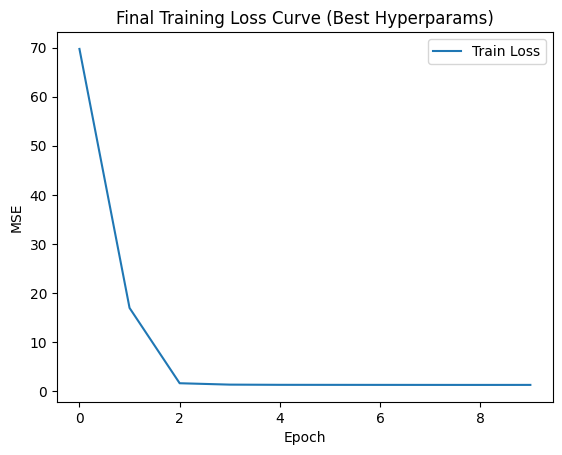

In [36]:
# =============================================================================
# 6. RETRAIN ON ALL CV DATA WITH BEST PARAM & EVALUATE ON HOLDOUT
# =============================================================================

print("\nRetrain with Best Hyperparams on entire CV dataset...")

# Build a training dataset from all cv_data
train_ds_final = build_dataset_for_train(cv_data, batch_size=64, shuffle=True)
best_model = create_model(
    embedding_dim=best_param['embedding_dim'],
    lstm_hidden_size=best_param['lstm_hidden_size'],
    learning_rate=best_param['learning_rate']
)

# Train with more epochs
history_final = best_model.fit(train_ds_final, epochs=10, verbose=1)

# Build a dataset from holdout data to calculate final MSE/RMSE
test_ds_holdout_for_loss = build_dataset_for_train(test_holdout_data, batch_size=64, shuffle=False)
test_mse = best_model.evaluate(test_ds_holdout_for_loss, verbose=0)
test_rmse = math.sqrt(test_mse)
print(f"\n[FINAL TEST] MSE={test_mse:.4f}, RMSE={test_rmse:.4f}")

# Optional: Plot the training loss curve
plt.figure()
plt.plot(history_final.history['loss'], label='Train Loss')
plt.title("Final Training Loss Curve (Best Hyperparams)")
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [37]:
# =============================================================================
# 7. INFERENCE / VISUALIZATION: COLLECT (date, VIN, y_pred, y_true)
# =============================================================================

print("\nInference with date & VIN for Time Series Visualization...")

# Build a dataset that returns (y_label, date, vin) as well
test_ds_holdout_for_infer = build_dataset_for_inference(test_holdout_data, batch_size=64)

y_preds_log = []
y_trues_log = []
dates_list  = []
vins_list   = []

for (X_batch, Y_info_batch) in test_ds_holdout_for_infer:
    # Y_info_batch => (y_label, date_str, vin_str)
    y_label_batch, date_batch, vin_batch = Y_info_batch
    
    # Predict: shape => [batch_size, 1]
    preds = best_model.predict(X_batch)
    
    y_preds_log.extend(preds.ravel().tolist())
    y_trues_log.extend(y_label_batch.numpy().tolist())
    dates_list.extend(date_batch.numpy().tolist())
    vins_list.extend(vin_batch.numpy().tolist())

# Step: revert log(price+1) => original price
y_preds = np.exp(y_preds_log) - 1
y_trues = np.exp(y_trues_log) - 1

# Make a dataframe to store prediction results
df_pred = pd.DataFrame({
    'VIN': [v.decode('utf-8') if isinstance(v, bytes) else v for v in vins_list],
    'date': [
        pd.to_datetime(d.decode('utf-8')) if isinstance(d, bytes) else pd.to_datetime(d)
        for d in dates_list
    ],
    'y_true': y_trues,
    'y_pred': y_preds
})
df_pred.sort_values(by=['VIN', 'date'], inplace=True)


Inference with date & VIN for Time Series Visualization...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━

2025-03-16 17:31:20.260765: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


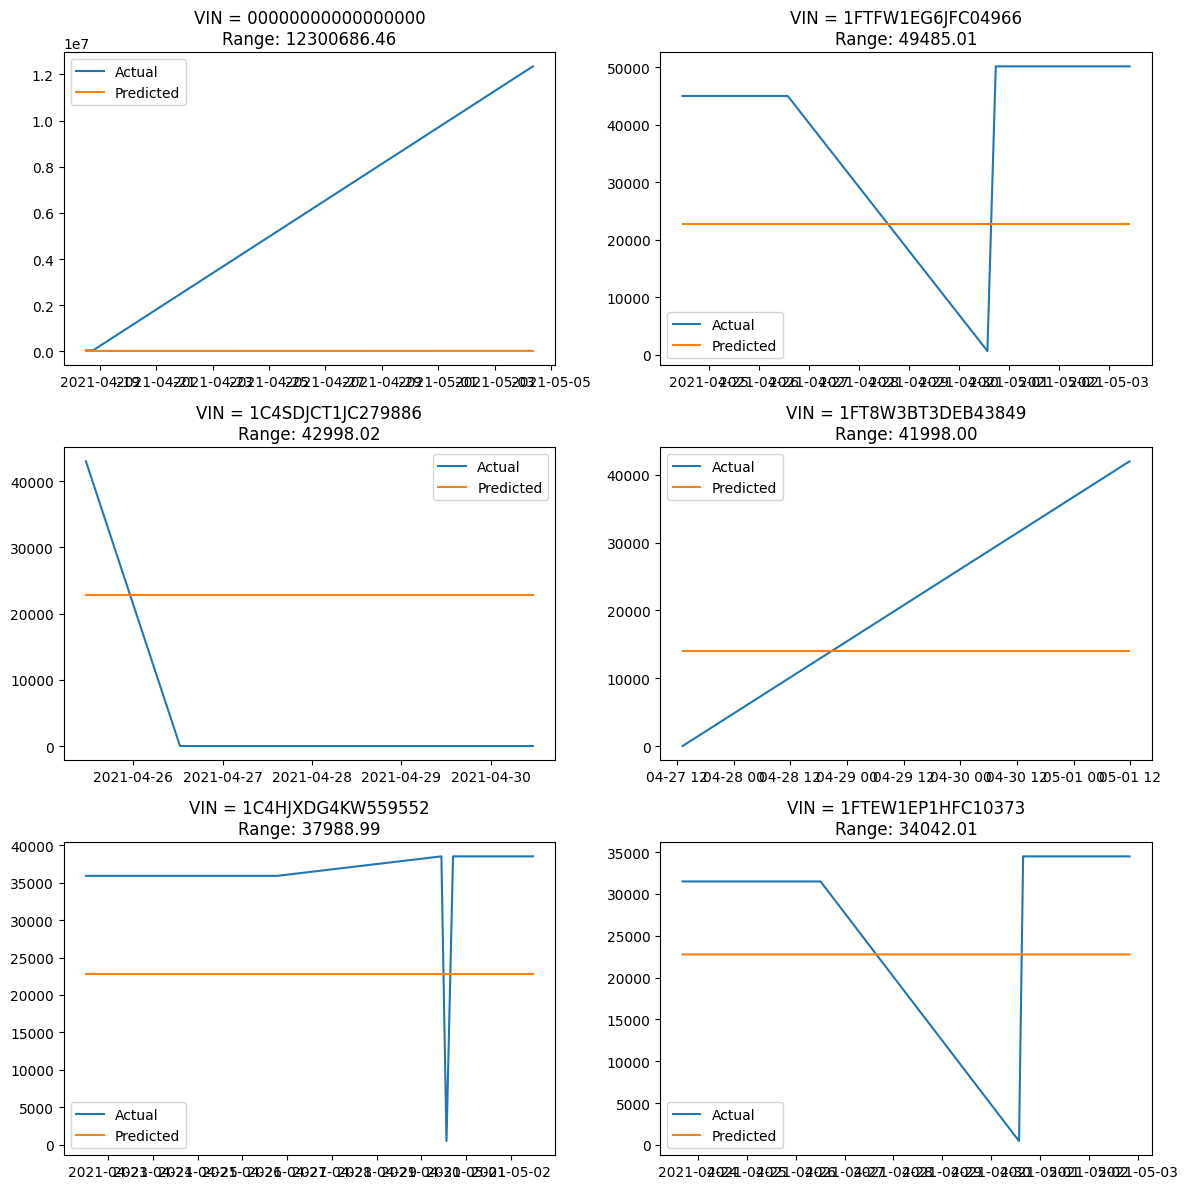

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Assume you already have df_pred, containing columns: ['VIN', 'date', 'y_true', 'y_pred']
# where y_true and y_pred are original prices (if log(price+1) was used before, make sure to restore using exp(...)-1)

# 1) Group by VIN, calculate "Price Range" = max(y_true) - min(y_true)
vin_ranges = []
grouped = df_pred.groupby('VIN')
for vin, group in grouped:
    price_range = group['y_true'].max() - group['y_true'].min()
    vin_ranges.append((vin, price_range))

# 2) Sort by price range in descending order
vin_ranges.sort(key=lambda x: x[1], reverse=True)

# 3) Select the top N (e.g., 5) VINs with the largest price fluctuations
top_n = 5
selected_vins = [x[0] for x in vin_ranges[:top_n + 1]]

# 4) Plot: Create a subplot for each VIN
num_vins = len(selected_vins)
cols = 2  # Number of plots per row
rows = math.ceil(num_vins / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
# If there's only one row and one column, axes may not be an array; flatten it here for consistency
axes = axes.flatten() if num_vins > 1 else [axes]

for i, vin_id in enumerate(selected_vins):
    ax = axes[i]
    
    # Extract data for this VIN
    tmp = df_pred[df_pred['VIN'] == vin_id].copy()
    tmp.sort_values('date', inplace=True)
    
    # Plot actual vs. predicted prices
    ax.plot(tmp['date'], tmp['y_true'], label='Actual')
    ax.plot(tmp['date'], tmp['y_pred'], label='Predicted')
    
    # Include "Range" information in the title for additional context
    vin_range = vin_ranges[i][1]
    ax.set_title(f"VIN = {vin_id}\nRange: {vin_range:.2f}")
    ax.legend()

# If top_n < rows*cols, there will be extra subplots; hide them here
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def build_Xy_for_linear(data_list, seq_len=3):
    X_list = []
    y_list = []
    for (num_seq, vin_seq, bm_seq, y, y_date, vin_str) in data_list:
        # num_seq shape => (seq_len, num_numeric_features)
        # flatten:
        x_flat = num_seq.flatten()  # shape (seq_len * num_numeric_features,)
        
        X_list.append(x_flat)
        y_list.append(y)
    
    X = np.array(X_list, dtype=np.float32)
    y = np.array(y_list, dtype=np.float32)
    return X, y


| Embedding Dim | LSTM Hidden Size | Learning Rate | Fold 1 MSE | Fold 2 MSE | Fold 3 MSE | Average CV MSE |
|---------------|------------------|---------------|------------|------------|------------|----------------|
| 8             | 32               | 0.001         | 1.2808     | 1.2705     | 1.2943     | 1.2819         |
| 16            | 64               | 0.0001        | 5.1336     | 7.9843     | 3.2331     | 5.4503         |
| 16            | 128              | 0.0001        | 1.2368     | 1.2252     | 1.2376     | 1.2332         |